## KLASIFIKASI LOGO UNTUK MENDETEKSI COPYRIGHT MENGGUNAKAN METODE CNN

Program ini dibuat untuk menentukan kemiripan gambar logo yang baru dibuat dengan logo-logo yang telah ada yang telah dipelajari oleh mesin dengan metode Convolutional Neural Network.

Dev by : Nur Muhammad Erji Ridho Lubis

Datasheet : https://drive.google.com/file/d/1XN3dAziIMjs_4_UIV520KF2R2XhxunkN/view?usp=sharing


In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile,os, io, shutil

from ipywidgets import FileUpload
from IPython.display import display
from PIL import Image

# from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# # extract datasheets
# local_zip = '/tmp/logo.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/logos3')
# zip_ref.close()

In [3]:
base_dir = '/tmp/logo_fix'
logos = os.listdir(base_dir)

#inisiasi direktori train & validation
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
#membuat membuat dan validasi direktori train dan validation
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

In [5]:
#Membagi sampel data
data_dir = {}
for i in logos:
    data_dir[i] = os.path.join("/tmp/logo_fix/"+i)


split_data = {}
for j in data_dir:
    split_data['train_'+ j +'_dir'], split_data['val_'+ j +'_dir'] = train_test_split(os.listdir(data_dir[j]), test_size = 0.2)


In [6]:
#Menginisiasi directory train dan validation ke masing-masing directory sampel data
train = {}
val = {}

for i in logos:
    train['train_'+i] = os.path.join(train_dir, i)
    val['val_'+i] = os.path.join(validation_dir, i)


In [7]:
     
for i in train:
#     print(train[i])
    if not os.path.exists(train[i]):
        os.mkdir(train[i])

for j in val:
    if not os.path.exists(val[j]):
        os.mkdir(val[j])
    

In [8]:
#copy data train ke directory baru

for i in data_dir:
#     split_data['train_'+ j +'_dir']
    for j in split_data['train_'+ i +'_dir']:
        shutil.copy(os.path.join(data_dir[i], j), os.path.join(train['train_'+i], j))
    
    for k in split_data['val_'+ i +'_dir']:
        shutil.copy(os.path.join(data_dir[i], k), os.path.join(val['val_'+i], k))



In [9]:
# image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range=0.2,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [10]:
# image data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    shuffle=True,
    batch_size=32,
    #subset='training',
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    # shuffle=False,
    batch_size=32,
    #subset='validation',
    class_mode='categorical',
)

Found 4988 images belonging to 10 classes.
Found 1253 images belonging to 10 classes.


In [11]:
# make CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(logos), activation='softmax')
])

In [12]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# latih model dengan model.fi
history = model.fit(
    train_generator,
    steps_per_epoch=40,
    epochs=60,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
)

Epoch 1/60
40/40 - 26s - loss: 1.7201 - accuracy: 0.3531 - val_loss: 0.9997 - val_accuracy: 0.6938
Epoch 2/60
40/40 - 23s - loss: 0.8574 - accuracy: 0.7117 - val_loss: 0.6167 - val_accuracy: 0.8313
Epoch 3/60
40/40 - 21s - loss: 0.5684 - accuracy: 0.8158 - val_loss: 0.6880 - val_accuracy: 0.7875
Epoch 4/60
40/40 - 21s - loss: 0.5380 - accuracy: 0.8386 - val_loss: 0.3882 - val_accuracy: 0.8875
Epoch 5/60
40/40 - 20s - loss: 0.3861 - accuracy: 0.8617 - val_loss: 0.3888 - val_accuracy: 0.8750
Epoch 6/60
40/40 - 20s - loss: 0.3285 - accuracy: 0.8864 - val_loss: 0.3505 - val_accuracy: 0.8875
Epoch 7/60
40/40 - 20s - loss: 0.3050 - accuracy: 0.8773 - val_loss: 0.4158 - val_accuracy: 0.8750
Epoch 8/60
40/40 - 20s - loss: 0.3345 - accuracy: 0.8891 - val_loss: 0.3446 - val_accuracy: 0.8750
Epoch 9/60
40/40 - 19s - loss: 0.3012 - accuracy: 0.9039 - val_loss: 0.3109 - val_accuracy: 0.8875
Epoch 10/60
40/40 - 19s - loss: 0.1755 - accuracy: 0.9389 - val_loss: 0.2305 - val_accuracy: 0.9563
Epoch 11/

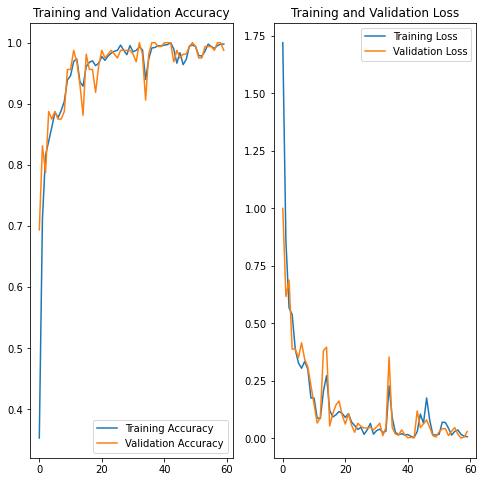

Train loss: 0.013658802025020123 %
Train accuracy: 99.59903955459595 %


In [16]:
# tampilkan hasil akurasi kedalam plot
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(60)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

score = model.evaluate(train_generator, verbose = 0)
print('Train loss:', score[0], "%") 
print('Train accuracy:', score[1] * 100, "%")

In [17]:
upload = FileUpload()
display(upload)



FileUpload(value={}, description='Upload')

phone.png
kemiripan : 
dengan whatsapp : 100.0 % mirip


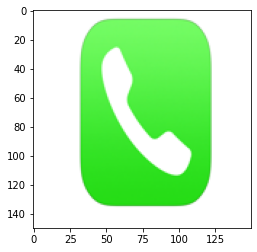

In [18]:

for name, file_info in upload.value.items():
    img = Image.open(io.BytesIO(file_info['content']))
    img = img.resize((150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=60)
    print(name)
    
    index = 0
    n = 0

    print("kemiripan : ")
    
    for i in classes[0]:
        if i >= 0.50:
            n += 1
            print(f"dengan {logos[index]} : {i * 100} % mirip")
#             print(i)
        index += 1
    
    if n == 0:
        print("Logo tidak terdeteksi Hak Cipta.")
  